# Predicting Loan Repayment


## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or not a borrower will pay back their loan? This way, in the future, when we get a new potential customer, we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----
Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----


# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Data/lending_club_loan.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<Axes: xlabel='loan_status', ylabel='count'>

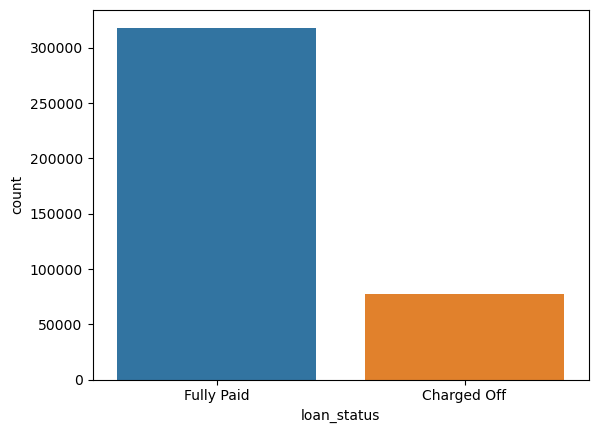

In [5]:
#Check the counts for our label column.
sns.countplot(df, x = 'loan_status', hue = 'loan_status')

Our dataset label variable is relatively unbalanced.

<Axes: >

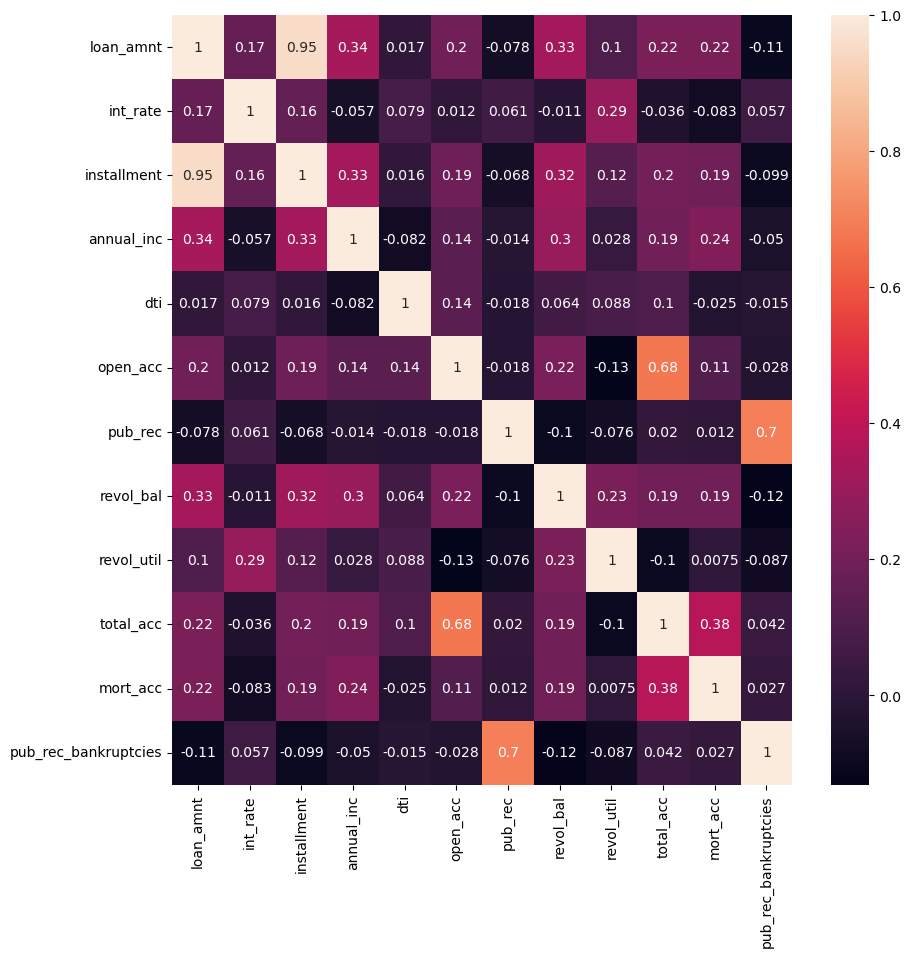

In [49]:
# Correlation between features
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='installment', ylabel='loan_amnt'>

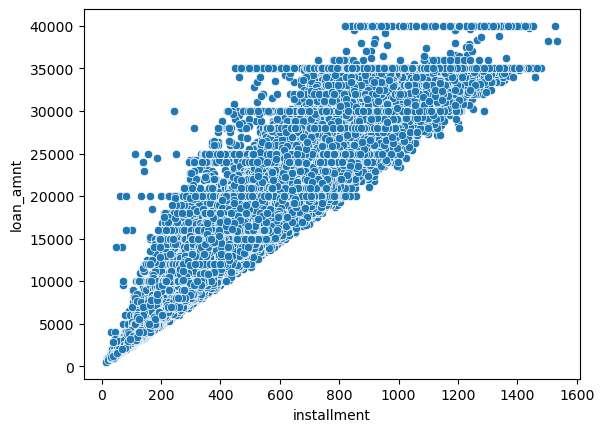

In [51]:
sns.scatterplot(df, x = 'installment', y = 'loan_amnt')

There is a very high correlation with instalment and loan_amnt.

Is there a relationship between the size of the loan and being able to pay it off?

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

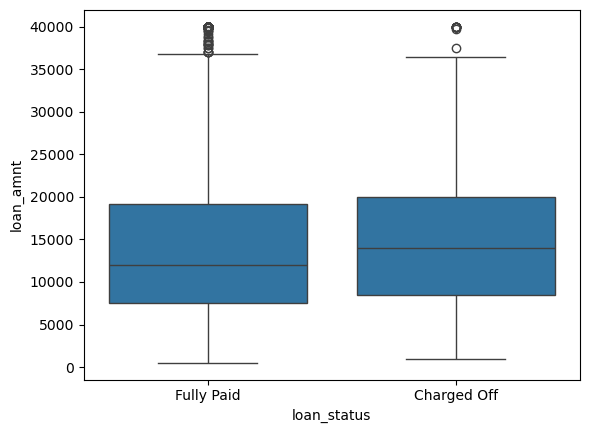

In [53]:
sns.boxplot(df, x = 'loan_status', y = 'loan_amnt')

In [55]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


These are very similar, so loan amount isn't a big indicator as to whether someone pays off the loan or not.

Looking into the grade and subgrade columns.

In [58]:
print(df['grade'].unique())
print(df['sub_grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']
['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


<Axes: xlabel='grade', ylabel='count'>

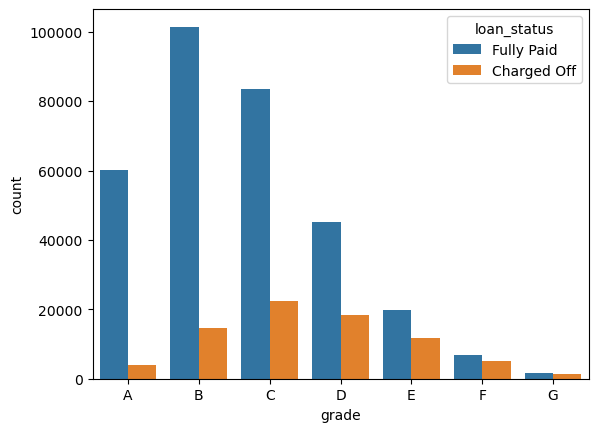

In [63]:
sns.countplot(df, x = 'grade', hue = 'loan_status', order=('A','B', 'C','D','E','F','G'))

<Axes: xlabel='sub_grade', ylabel='count'>

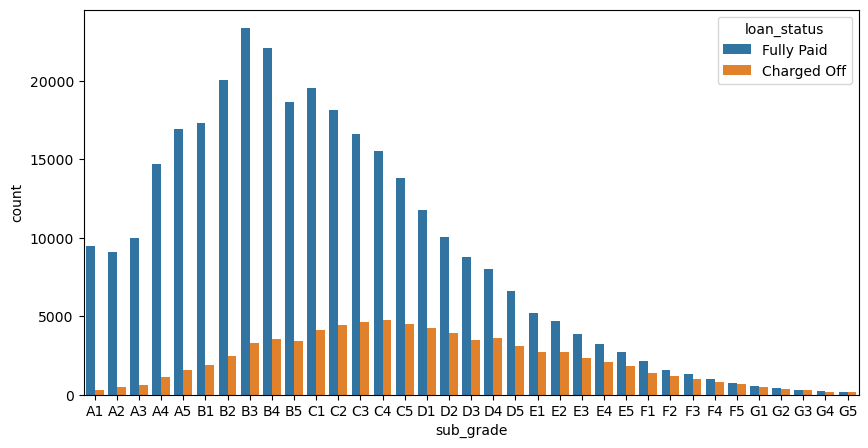

In [75]:
plt.figure(figsize=(10,5))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(data = df, x = 'sub_grade', order = (sub_grade_order), hue = 'loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

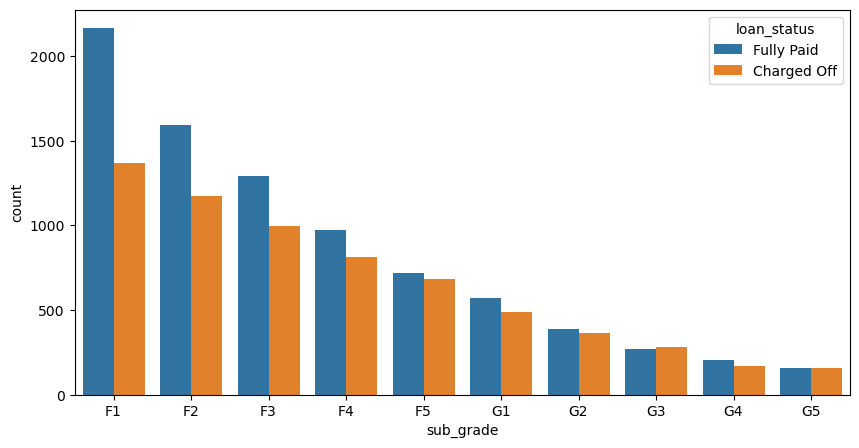

In [77]:
poor_sub_grade = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(10,5))
sub_grade_order = sorted(poor_sub_grade['sub_grade'].unique())
sns.countplot(data = poor_sub_grade, x = 'sub_grade', order = (sub_grade_order), hue = 'loan_status')

Poor grades have a very high chance of not paying off the loan.

In [6]:
# Convert label feature to a binary number
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [7]:
df = df.drop('loan_status', axis = 1)

<Axes: >

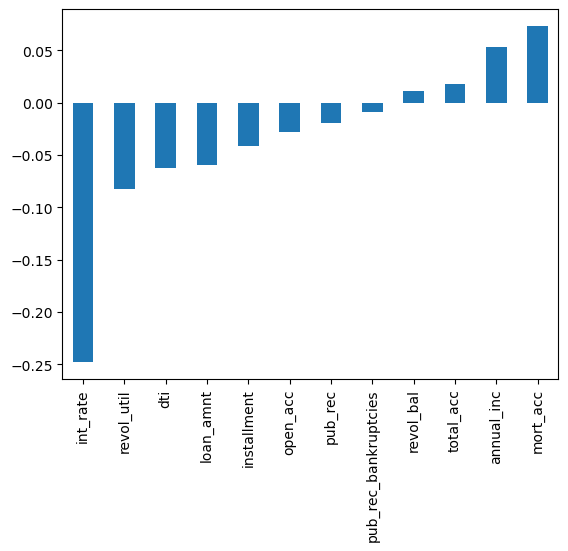

In [8]:
# visualise the correlation between the target label feature and the other features.
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

Interest rate has the highest negative correlation with repaying a loan; this makes sense as having a higher interest rate makes it harder to fully pay off a loan.

# Data preprocessing

## Handling Missing Values

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394274 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [9]:
#Get columns with missing data.

missing_data_cols = []
for x in df.columns:
    if sum(df[x].isnull()) > 0:
        missing_data_cols.append(x)
print(missing_data_cols)

['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']


Some features have misisng data.

In [7]:
df['emp_title']

0                        Marketing
1                  Credit analyst 
2                     Statistician
3                  Client Advocate
4          Destiny Management Inc.
                    ...           
396025            licensed bankere
396026                       Agent
396027                City Carrier
396028        Gracon Services, Inc
396029    Internal Revenue Service
Name: emp_title, Length: 396030, dtype: object

In [18]:
len(df['emp_title'].unique())

173106

There are 173106 unique emp_titles and the values are categorical, so it will be easier to remove this column from the df before producing a model.

In [10]:
df = df.drop('emp_title', axis = 1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [8]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [23]:
len(df['emp_length'].unique())

12

<Axes: xlabel='emp_length', ylabel='count'>

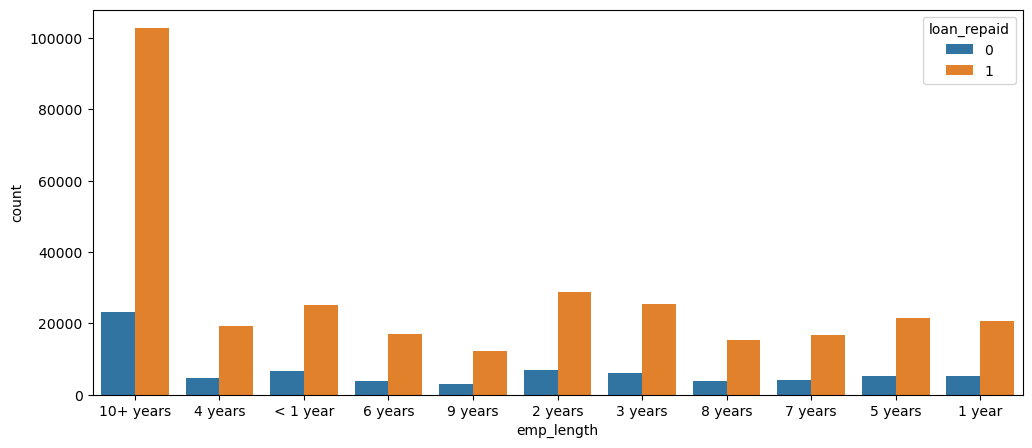

In [86]:
plt.figure(figsize = (12,5))
sns.countplot(df , x = 'emp_length', hue = 'loan_repaid')

In [35]:
# What percentage of this column is missing
(sum(df['emp_length'].isnull())/396030)*100

4.621114562028129

In [94]:
# What are the ratios of paid to not paid loans for each emp_length category
emp_1 = df[df['loan_repaid']==1].groupby('emp_length').count()['loan_repaid']

emp_0 = df[df['loan_repaid']==0].groupby('emp_length').count()['loan_repaid']
emp_1/emp_0

emp_length
1 year       4.021731
10+ years    4.429291
2 years      4.174321
3 years      4.122129
4 years      4.197917
5 years      4.203260
6 years      4.285569
7 years      4.134155
8 years      4.006007
9 years      3.988274
< 1 year     3.833917
Name: loan_repaid, dtype: float64

Because all emp_length categories have very similar ratios between paid and not paid loans, this feature likely doesnt include much information as to whether someone will pay a loan or not, so we can remove this column.

In [11]:
df = df.drop('emp_length',axis = 1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [10]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [42]:
len(df['title'].unique())

48817

The title column is categorical and has nearly 5000 unique values, so its easiest to remove this column.

In [12]:
df = df.drop('title', axis = 1)

In [142]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [168]:
df['revol_util']

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

In [44]:
# what percentage of 'revol_util' is missing
(sum(df['revol_util'].isnull())/396030)*100

0.06969169002348306

Few samples are mssing from this column that its reasonable to impute missing values using the mean of this column.

In [13]:
revol_util_mean = df['revol_util'].mean()
df['revol_util'] = df['revol_util'].fillna(revol_util_mean)
sum(df['revol_util'].isnull())

0

In [143]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [144]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

<Axes: xlabel='mort_acc', ylabel='count'>

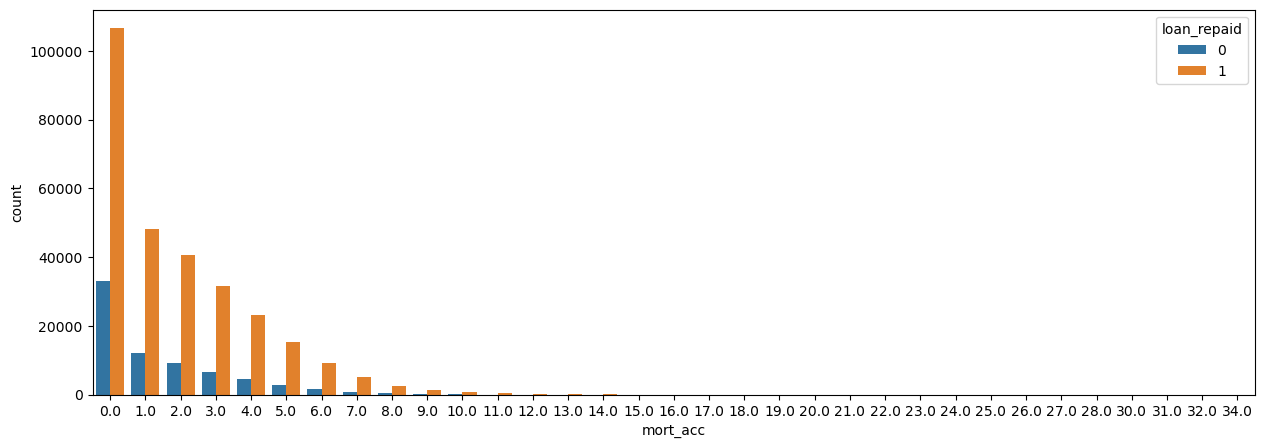

In [145]:
plt.figure(figsize = (15,5))
sns.countplot(df, x = 'mort_acc', hue = 'loan_repaid')

In [114]:
# What percentage of the values are missing?
(sum(df['mort_acc'].isnull())/396030)*100

9.543468929121532

<Axes: >

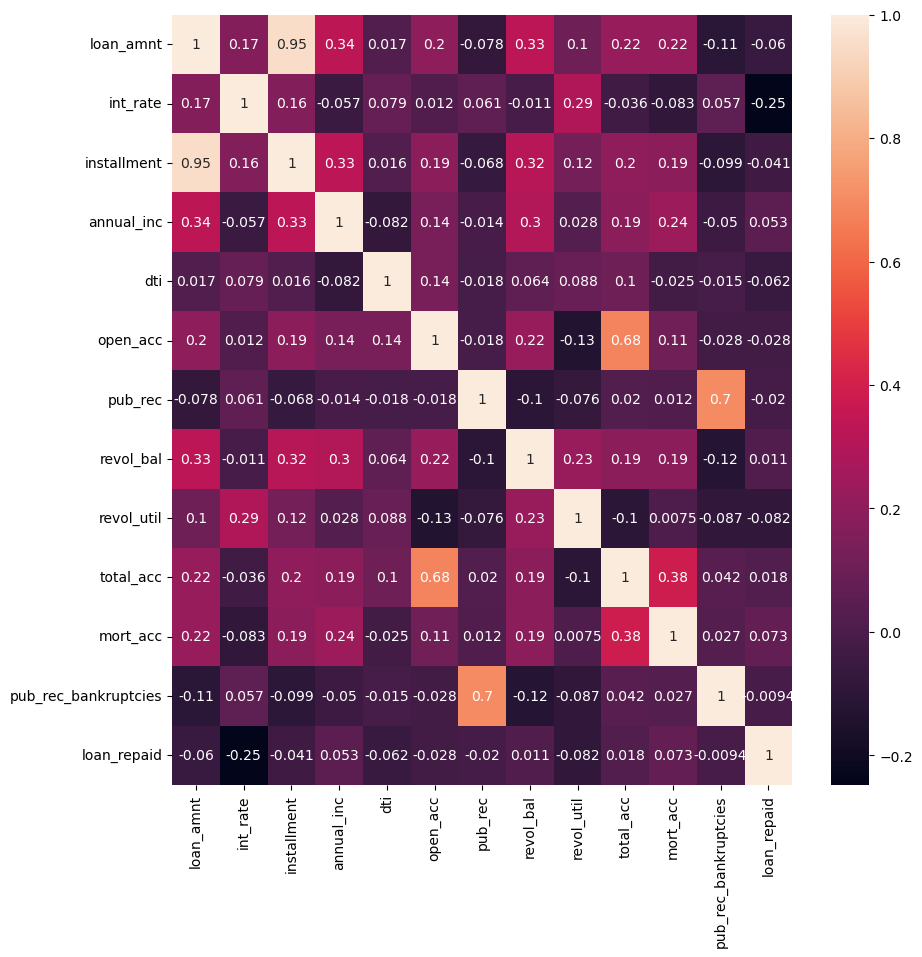

In [146]:
#Check if any other features are correlated to the mort_acc
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(numeric_only = True),annot= True)

No features are strongly correlated with the mort_acc, so we will impute using the most common value, which was 0.

In [18]:
df['mort_acc'] = df['mort_acc'].fillna(0)

In [19]:
sum(df['mort_acc'].isnull())

0

In [180]:
df['pub_rec_bankruptcies']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: pub_rec_bankruptcies, Length: 396030, dtype: float64

In [181]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

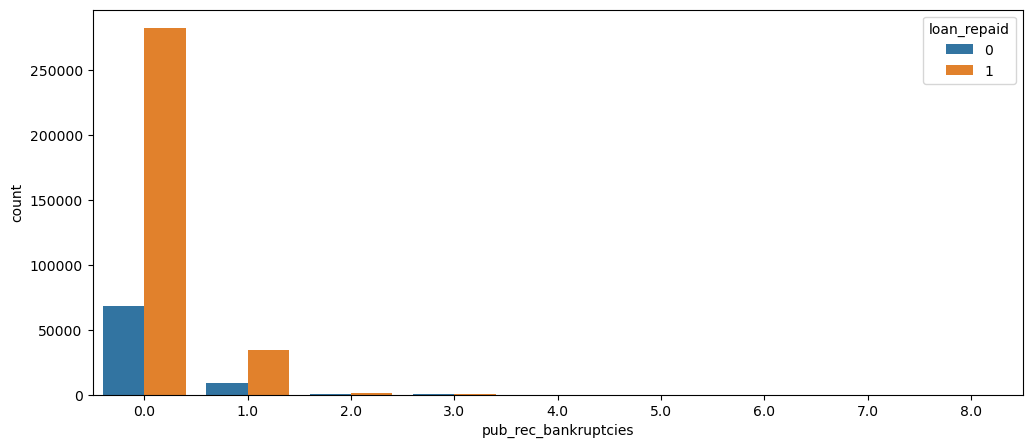

In [182]:
plt.figure(figsize = (12,5))
sns.countplot(df, x = 'pub_rec_bankruptcies', hue = 'loan_repaid')

In [183]:
# What percetnatge of pub_rec_bankruptcies is missing values
(sum(df['pub_rec_bankruptcies'].isnull())/396030)*100

0.13509077595131683

In [20]:
# fill missing values with the most common number
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0.0)

In [21]:
sum(df['pub_rec_bankruptcies'] .isnull())

0

In [14]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

All missing values have now been dealt with.

# Handle Categorical values

In [15]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [16]:
df['term'].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [19]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

This is a binary variable so we can map this to be 36 and 60.

In [22]:
df['term'] = df['term'].map({' 36 months':36, ' 60 months': 60 })

In [31]:
# next is the grade feature , which we know is related to subgrade, so we can drop this.
df = df.drop('grade', axis = 1)

In [24]:
# Convert subgrade into a dummy variable
dummies = pd.get_dummies(df['sub_grade'],drop_first = True)

df = pd.concat([df.drop('sub_grade', axis = 1), dummies], axis = 1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [32]:
# verification_status, application_type and initial_list_status also need to be turned into dummy variables

dummies = pd.get_dummies(df[['verification_status','initial_list_status','application_type']],drop_first = True)
df = pd.concat([df.drop(['verification_status','initial_list_status','application_type'], axis = 1), dummies], axis = 1)

df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT'],
      dtype='object')

In [33]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

We don't want to add unnecessary complexity to the model, so we will merge the any and none categories with the other category. Before converting home_ownership into a dummy variable.

In [33]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [34]:

dummies = pd.get_dummies(df['home_ownership'],drop_first = True)
df = pd.concat([df.drop('home_ownership', axis = 1), dummies], axis = 1)

df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [38]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

For the address feature, we want to extract the zipcode.

In [35]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [36]:
#Because there is not many unique zipcodes we can turn them into dummy variables
df = df.drop('address', axis = 1)

dummies = pd.get_dummies(df['zip_code'],drop_first = True)
df = pd.concat([df.drop('zip_code', axis = 1), dummies], axis = 1)

In [37]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'OTHER', 'OWN',
       'RENT', '05113', '11650', '22690', '29597', '30723', '48052', '70466',
       '86630', '93700'],
      dtype='object')

In [38]:
# We can drop issue_d because we wont have an issue date when using th emodel to predict.
df = df.drop('issue_d', axis = 1)

In [44]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [39]:
# we will extract the year from this feature
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [47]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 396030, dtype: int64

In [55]:
#check that everything is integer or float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   annual_inc            396030 non-null  float64
 5   purpose               396030 non-null  object 
 6   dti                   396030 non-null  float64
 7   earliest_cr_line      396030 non-null  int64  
 8   open_acc              396030 non-null  float64
 9   pub_rec               396030 non-null  float64
 10  revol_bal             396030 non-null  float64
 11  revol_util            396030 non-null  float64
 12  total_acc             396030 non-null  float64
 13  mort_acc              396030 non-null  float64
 14  pub_rec_bankruptcies  396030 non-null  float64
 15  

In [57]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

<Axes: xlabel='purpose', ylabel='count'>

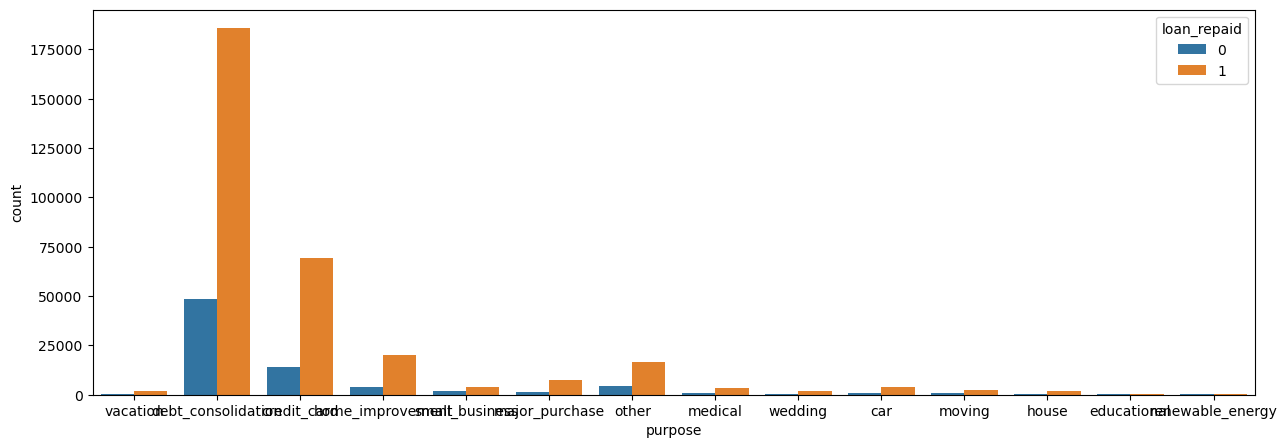

In [61]:
plt.figure(figsize = (15,5))
sns.countplot(df, x = 'purpose', hue = 'loan_repaid' )

In [40]:
# This feature seems to show patterns in terms of loan repayment so I will keep it but convert it to a dummy variable.

dummies = pd.get_dummies(df['purpose'],drop_first = True)
df = pd.concat([df.drop('purpose', axis = 1), dummies], axis = 1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'OTHER', 'OWN', 'RENT', '05113', '11650',
       '22690', '29597', '30723', '48052', '70466', '86630', '93700',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object')

In [42]:
# How many variables do we have?
len(df.columns)

79

# Split the data into a Training and Testing set.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data.

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
#normalise the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [49]:
X_train.shape

(277221, 78)

In [70]:
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 25)

In [78]:
model.fit(x=X_train, y=y_train, epochs = 150, batch_size = 256, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2460 - val_loss: 0.2636
Epoch 2/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2490 - val_loss: 0.2648
Epoch 3/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2490 - val_loss: 0.2655
Epoch 4/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2474 - val_loss: 0.2650
Epoch 5/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2480 - val_loss: 0.2644
Epoch 6/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2472 - val_loss: 0.2649
Epoch 7/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2468 - val_loss: 0.2640
Epoch 8/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - loss: 0.2482 - val_loss: 0.2640
Epoch 9/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2467 - val_loss: 0.2658
Epoch 10/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2467 - val_loss: 0.2639
Epoch 11/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2469 - val_loss: 0.2647
Epoch 12/150
1083

<Axes: >

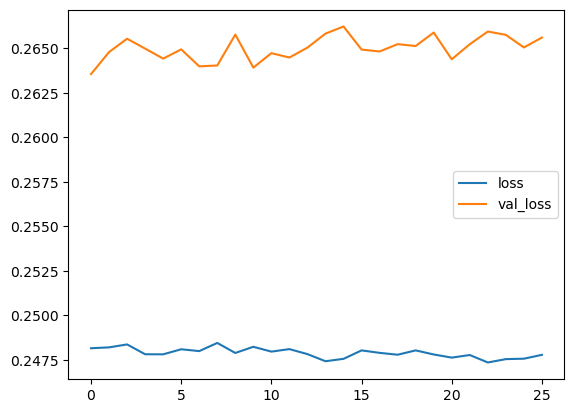

In [79]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
# get model predictions
pred = model.predict(X_test)

threshold = 0.5
pred = np.where(pred> threshold, 1,0)

3713/3713 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step 


In [85]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62     23370
           1       0.88      0.99      0.93     95439

    accuracy                           0.89    118809
   macro avg       0.90      0.73      0.78    118809
weighted avg       0.89      0.89      0.87    118809



<Axes: xlabel='loan_repaid', ylabel='count'>

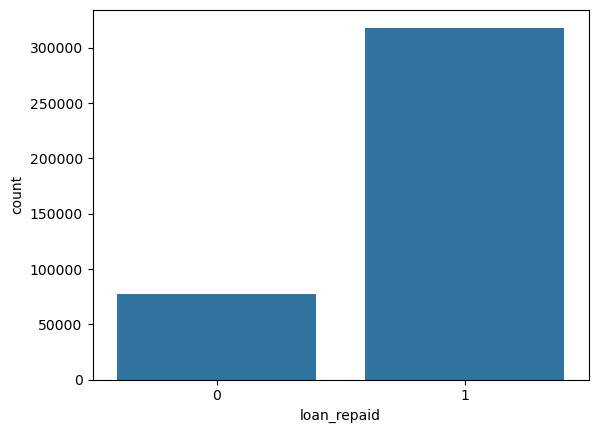

In [86]:
sns.countplot(df, x = 'loan_repaid')

The accuracy of the model is high because there was a large class imbalance in the label. The model is more accurate at predicting the most common class as this has a far higher f1 score. Recall is very low for the 0 class.

In [87]:
# Experiment with more dropouts

model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 25)

In [88]:
model.fit(x=X_train, y=y_train, epochs = 150, batch_size = 256, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.4303 - val_loss: 0.2691
Epoch 2/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2772 - val_loss: 0.2644
Epoch 3/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2721 - val_loss: 0.2637
Epoch 4/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2680 - val_loss: 0.2635
Epoch 5/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2687 - val_loss: 0.2625
Epoch 6/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2653 - val_loss: 0.2629
Epoch 7/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - loss: 0.2660 - val_loss: 0.2630
Epoch 8/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2651 - val_loss: 0.2620
Epoch 9/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2635 - val_loss: 0.2627
Epoch 10/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2651 - val_loss: 0.2620
Epoch 11/150
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2634 - val_loss: 0.2622
Epoch 12/150
1083

<Axes: >

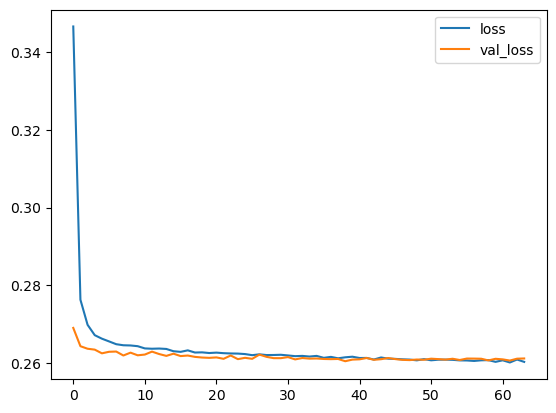

In [89]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [90]:
# get model predictions
pred = model.predict(X_test)

threshold = 0.5
pred = np.where(pred> threshold, 1,0)

3713/3713 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step 


In [91]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23370
           1       0.88      1.00      0.93     95439

    accuracy                           0.89    118809
   macro avg       0.94      0.71      0.77    118809
weighted avg       0.90      0.89      0.87    118809



In [92]:
df['loan_repaid'].value_counts()

loan_repaid
1    318357
0     77673
Name: count, dtype: int64

In [93]:
318357/len(df)

0.8038709188697826

The model still performs relatively poorly on the 0 class in terms of recall. However, its overall performance is better than random, with an accuracy of 0.89. Given that 80% of the samples belong to class 1, this suggests the model is learning meaningful patterns rather than simply predicting the majority class.

# Make a prediction for a new customer.

In [94]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt           24000.0
term                     60
int_rate              13.11
installment          547.43
annual_inc          85000.0
                     ...   
other                 False
renewable_energy      False
small_business        False
vacation              False
wedding               False
Name: 304691, Length: 78, dtype: object

In [95]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [96]:

pred = model.predict(new_customer)

threshold = 0.5
pred = np.where(pred> threshold, 1,0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


In [98]:
print(df.iloc[random_ind]['loan_repaid'])
print(pred)

1
[[1]]


The prediction was correct for this hyperthetical new customer.